# Markowitz Modern Portfolio Theory - Summary Insights and Python Implementation

### By: Amos Anderson

## Introduction

Modern Portfolio Theory (MPT), introduced by American economist Harry Markowitz in 1952, is a mean-variance optimization framework that aims to determine the optimal allocation of assets in a portfolio over a single period. MPT seeks to minimize portfolio risk (measured by the standard deviation) while maximizing the expected return (mean) of the portfolio.

In this article, we present a concise summary of MPT, focusing on solutions to the optimization problem without delving into detailed mathematical derivations. Our goal is to provide readers new to MPT with an accessible overview of the theory, while offering experienced readers a useful recap and perhaps a fresh perspective. With the addition of Python-based implementations, this article introduces practical programming methods for tackling mean-variance optimization problems.

### A Conscise look at the Modern Portfolio Theory
Consider a set of $n$ assets, each with a single payout period. We can combine these assets to create a portfolio ($\rho$).

* A **portfolio** is simply a collection of assets selected for investment.

Each asset, ($i$), in the portfolio ($\rho $) has the following attributes:
1.  An expected rate of return, $u_{i}$.
2. An associated risk, measured by its standard deviation $\sigma_{i}$.
3. A proportion or weight $x_{i}$ in the portfolio $\rho$.

## Getting the assets
As mentioned, we need assets to create a portfolio. But how do we obtain these assets? Answering this question is essential, as generating portfolios is prerequisite for performing mean-variance optimization. One of the most effective and flexible methods for this purpose is the **Monte Carlo Simulation.**

The Monte Carlo Simulation is straightforward: it samples a large number of random variables from a known distribution and then averages them according to a specific rule to produce a set of random variables with desired characteristics. This method relies on the law of large numbers, which states that "as sample size becomes very large, the sample mean approaches the true mean of the distribution."

In this article, we will use Monte Carlo simulation to sample a large number of random proportional assets from the Dirichlet distribution, and then adjust them so that the sum of weights for each portfolio equals one.

##### A Python code for Monte Carlo Simulation with samples from the Dirichlet Distribution

In [2]:
import numpy as np
import scipy.stats as stats

def nDirichletSamples(dimVec):
    alpha = np.ones(dimVec)
    samples = np.random.dirichlet(alpha)
    return samples

def iDirichletSamples(dimVec,iSimulations):
    alpha = np.ones(dimVec)
    samples = np.random.dirichlet(alpha,iSimulations)
    return samples

In [126]:
xInstance = iDirichletSamples(3,10000)

xInstance

array([[0.10544147, 0.4136039 , 0.48095464],
       [0.15514022, 0.71930709, 0.12555268],
       [0.50741235, 0.16021784, 0.33236982],
       ...,
       [0.52662334, 0.08918522, 0.38419145],
       [0.04671026, 0.62718318, 0.32610656],
       [0.63601607, 0.34605865, 0.01792528]])

### Plotting the generated assets. 

We expect a triangular-shaped structure, often referred to as the "portfolio diagram lemma." This lemma states that, in a mean-standard deviation plot, the curve defined by nonnegative combinations of three assets (1, 2, and 3) lies within a triangular region. This region is bounded by the three original assets. If a risk-free asset is included, it is represented as a point on the vertical axis at a height corresponding to its return.



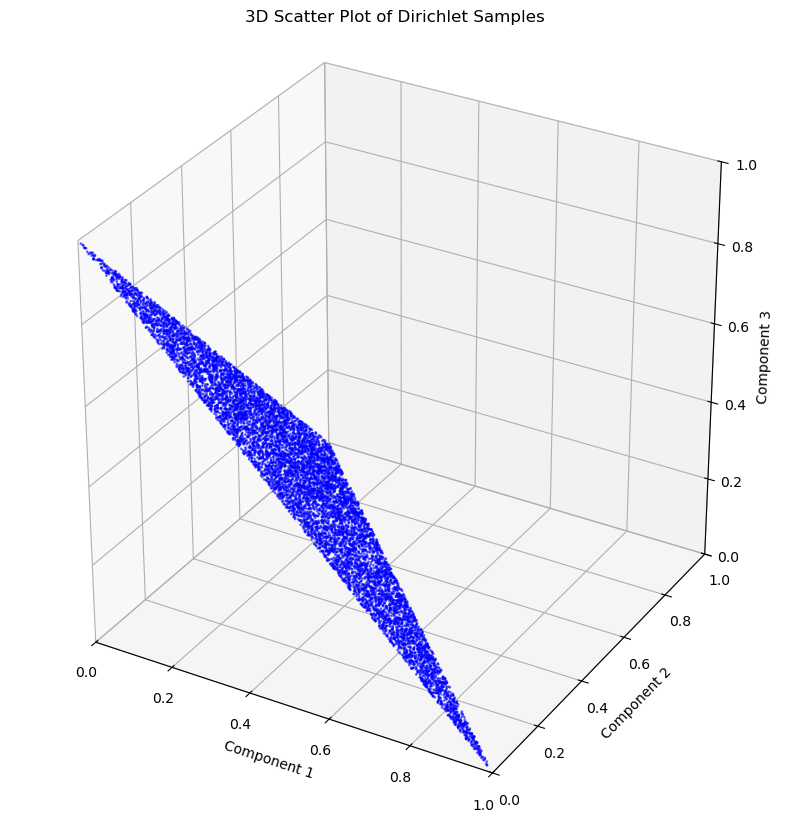

In [124]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three components of each sample
ax.scatter(xInstance[:, 0], xInstance[:, 1], xInstance[:, 2], alpha=0.5, color='b', s=1)

# Set axis limits and scaling to get straight edges
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_box_aspect([1, 1, 1])  

# Labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Scatter Plot of Dirichlet Samples')

plt.show()

## Getting the Mean and Standard Deviation Vectors of the Assets that form the Portfolio.

In most cases, the mean vector and standard deviation vector of the assets in a portfolio are known. This occurs in any of the following situations:

* **Working with Historical Data**: When you have past data on the assets in a portfolio over a number of years, it is usually straightforward to calculate the mean and standard deviation vectors of these assets. This now serves as a precomputed asset mean and standard deviation for further analysis.
* **Assumptions in Theoretical Models**: For learning and training purposes, instructors often provide students with precomputed asset mean and standard deviation vectors, especially when working with real data would be too large or complex in a classroom setting. For students new to modern portfolio theory, having the means and standard deviations of the assets provided makes learning the theory easier.
* **Working with Simulations or Synthetic Data**: In Monte Carlo simulations, where returns are generated based on predefined distributions, the mean and covariance matrix may be input parameters that define the characteristics of these distributions. For instance, when simulating returns for assets that follow a multivariate normal distribution, a known mean vector and covariance matrix are often used as inputs.

Considering these situations, we will proceed with our analysis under the assumption that the means and standard deviations of the assets are known, based on historical data. We will then apply Monte Carlo simulations to generate a large number of possible portfolios that could be constructed to reflect the known asset means and standard deviations.

## Finding the Expected Return of the Portfolio and the Risk Associated with the Portfolio. 

Now, suppose that $\mu$ is a known vector representing the expected return or mean of the assets, $\sigma$ is the known standard deviation of the assets and $X$ is the set of simulated random proportional assets (as given by the Monte Carlo Simulation) such that
$$\mu = \begin{bmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_n \end{bmatrix} \quad \quad \sigma = \begin{bmatrix} \sigma_1 \\ \sigma_2 \\ \vdots \\ \sigma_n \end{bmatrix} \quad \quad  X = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$$
Then the portfolio's expected return, that is, the portfolio mean is given by
$$\mu_{\rho} = \mu^{T}X = \begin{bmatrix} \mu_1 & \mu_2 & \cdots & \mu_n \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}=\sum_{i=1}^{n} x_{i}\mu_{i}$$
For a given correlation matrix $R$, we can find the covariance matrix $\Sigma$ using the identity $$\Sigma = D\cdot R \cdot D $$ Where $D$ is a diagonal matrix with its diagonal entries as the standard deviations of the assets. In vector notation, this is given as
$$\begin{bmatrix} \sigma_{11} & \sigma_{12} & \ldots & \sigma_{1n} \\ \sigma_{21} & \ddots & & \vdots \\ \vdots & & \ddots &\vdots \\\sigma_{n1} & \sigma_{n2} & \ldots & \sigma_{nn}\end{bmatrix} =\begin{bmatrix} \sigma_{1} & 0 & \ldots & 0 \\ 0 & \sigma_{2} & & \vdots \\ \vdots & & \ddots &\vdots \\0 & 0 & \ldots & \sigma_{n}\end{bmatrix} \begin{bmatrix} r_{11} & r_{12} & \ldots & r_{1n} \\ r_{21} & \ddots & & r_{2n} \\ \vdots & & \ddots &\vdots \\r_{n1} & r_{n2} & \ldots & r_{nn}\end{bmatrix} \begin{bmatrix} \sigma_{1} & 0 & \ldots & 0 \\ 0 & \sigma_{2} & & \vdots \\ \vdots & & \ddots &\vdots \\0 & 0 & \ldots & \sigma_{n}\end{bmatrix}$$
If the assets are uncorrelated, then the covariance matrix is given by 
$$\Sigma = \begin{bmatrix} \sigma_{1}^2 & 0 & \ldots & 0 \\ 0 & \sigma_{2}^2 & & \vdots \\ \vdots & & \ddots &\vdots \\0 & 0 & \ldots & \sigma_{n}^2\end{bmatrix} $$
The portfolio variance is given by is given by

$\begin{align*}
\sigma_{\rho} &=X^{T}\Sigma X \\
&=\begin{bmatrix}x_{1} & x_{2} & \cdots & x_{n}\end{bmatrix} \begin{bmatrix} \sigma_{11} & \sigma_{12} & \ldots & \sigma_{1n} \\ \sigma_{21} & \ddots & & \vdots \\ \vdots & & \ddots &\vdots \\\sigma_{n1} & \sigma_{n2} & \ldots & \sigma_{nn}\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} \\
&=\sum_{i,j}x_{i}x_{j}\sigma_{ij}
\end{align*}$

##### A Python Code for calculating the Portfolio Mean and Variances

### Scenario I: Correlated Assets

Consider two assets with mean returns, standard deviations and correlation matrix:
$$\mu = \begin{bmatrix}0.06 \\ 0.08\end{bmatrix}, \quad \quad \sigma = \begin{bmatrix}0.10 \\ 0.02\end{bmatrix}, \quad \quad R = \begin{bmatrix}1 & 0.60 \\ 0.60 & 1\end{bmatrix}$$
 We shall first determine the covariance matrix and then proceed to find the expected return of the portfolio (or portfolio mean), as well as variance and standard deviation of the portfolio.

In [12]:
import numpy as np

mu = np.array([0.06,0.08])
sigma = np.array([0.10,0.02])
diagonal_sigma = np.array([[0.10, 0],[0,0.02]])
corr = np.array([[1,0.60],[0.60,1]])

#Generating random portfolios
wgAssets = nDirichletSamples(2)

# The covariance matrix:
cov = np.dot(diagonal_sigma,np.dot(corr,diagonal_sigma))
mnPortfMean = np.dot(mu,wgAssets)
mnPortfVar = np.dot(wgAssets,np.dot(cov,wgAssets))
mnPortfStd = np.sqrt(mnPortfVar)

print("Covariance Matrix is : \n ", cov )
print("Portfolio Mean =   ", mnPortfMean )
print("Portfolio Variance =  ", mnPortfVar )
print("Portfolio Standard Deviation =  ", mnPortfStd )

Covariance Matrix is : 
  [[0.01   0.0012]
 [0.0012 0.0004]]
Portfolio Mean =    0.07410013888706654
Portfolio Variance =   0.0015681561120727669
Portfolio Standard Deviation =   0.039599950909979253


Now, consider a three asset portfolio whose mean, standard deviation and correlation matrix are given by
$$\mu = \begin{bmatrix}0.06 \\ 0.04 \\ 0.10 \end{bmatrix}, \quad \quad \sigma = \begin{bmatrix}0.05 \\ 0.08 \\ 0.10 \end{bmatrix}, \quad \quad R = \begin{bmatrix}1 & 0.30 & 0.8 \\ 0.30 & 1 & 0.50 \\ 0.80 & 0.30 & 1 \end{bmatrix}$$

In [44]:
import numpy as np

mnMean = np.array([0.06,0.04,0.10])
mnSigma = np.array([0.05,0.08,0.10])
mnDiagonal_sigma = np.array([[0.05, 0,0],[0,0.08,0],[0,0,0.10]])
mnCor = np.array([[1,0.30,0.80],[0.30,1,0.50],[0.80,0.30,1]])

#Generating random portfolios
wgdAssets = nDirichletSamples(3)

# The covariance matrix:
mnCov = np.dot(mnDiagonal_sigma,np.dot(mnCor,mnDiagonal_sigma))
vnPortfMean = np.dot(mnMean,wgdAssets)
vnPortfVar = np.dot(wgdAssets,np.dot(mnCov,wgdAssets))
vnPortfStd = np.sqrt(vnPortfVar)

print("Covariance Matrix is : \n ", mnCov )
print("Portfolio Mean =   ", vnPortfMean )
print("Portfolio Variance =  ", vnPortfVar )
print("Portfolio Standard Deviation =  ", vnPortfStd )

Covariance Matrix is : 
  [[0.0025 0.0012 0.004 ]
 [0.0012 0.0064 0.004 ]
 [0.004  0.0024 0.01  ]]
Portfolio Mean =    0.0494355081223249
Portfolio Variance =   0.0037515785272027907
Portfolio Standard Deviation =   0.06125013083416876


### Scenario II: Uncorrelated Assets

For the same two-asset problem in Scenario I, if the two assets are independent and thus uncorrelated, then we have the following:

In [46]:
import numpy as np

mu = np.array([0.06,0.08])
sigma = np.array([0.10,0.02])
diagonal_sigma = np.array([[0.10, 0],[0,0.02]])

#Generating random portfolios
wgAssets = nDirichletSamples(2)

# The covariance matrix:
cov = np.dot(diagonal_sigma,diagonal_sigma)
mnPortfMean = np.dot(mu,wgAssets)
mnPortfVar = np.dot(wgAssets,np.dot(cov,wgAssets))
mnPortfStd = np.sqrt(mnPortfVar)

print("Covariance Matrix is : \n ", cov )
print("Portfolio Mean =   ", mnPortfMean )
print("Portfolio Variance =  ", mnPortfVar )
print("Portfolio Standard Deviation =  ", mnPortfStd )

Covariance Matrix is : 
  [[0.01   0.    ]
 [0.     0.0004]]
Portfolio Mean =    0.07297627644630174
Portfolio Variance =   0.0014017010643802392
Portfolio Standard Deviation =   0.03743929839594005


Now let us consider the three-asset problem and assume that these assets are independent and hence uncorrelated. We can generate a set of possible portfolios using the the given portfolio mean and standard deviation. This set of portfolios becomes the feasible portfolios of the problem.

In [48]:
import numpy as np

mnMean = np.array([0.06,0.04,0.10])
mnSigma = np.array([0.05,0.08,0.10])
mnDiagonal_sigma = np.array([[0.05, 0,0],[0,0.08,0],[0,0,0.10]])

#Generating random portfolios
wgdAssets = nDirichletSamples(3)

# The covariance matrix:
mnCov = np.dot(mnDiagonal_sigma,mnDiagonal_sigma)
vnPortfMean = np.dot(mnMean,wgdAssets)
vnPortfVar = np.dot(wgdAssets,np.dot(mnCov,wgdAssets))
vnPortfStd = np.sqrt(vnPortfVar)

print("Covariance Matrix is : \n ", mnCov )
print("Portfolio Mean =   ", vnPortfMean )
print("Portfolio Variance =  ", vnPortfVar )
print("Portfolio Standard Deviation =  ", vnPortfStd )

Covariance Matrix is : 
  [[0.0025 0.     0.    ]
 [0.     0.0064 0.    ]
 [0.     0.     0.01  ]]
Portfolio Mean =    0.07697944260713441
Portfolio Variance =   0.002683479567514001
Portfolio Standard Deviation =   0.05180231237612855


At this point, we have successfully generated random assets and used them to find the expected return and risk of the given portfolio. It is important to note that the assets we are given could be used to form many different portfolios. The set of possible combinations of the given assets is called the feasible set of portfolios. We shall find the feasible set of portfolios next.

## Finding the Feasible Set of Portfolios

The feasible set of portfolios refers to the collection of all portfolios that can be constructed from a given set of assets, where each portfolio is characterized by its own expected return (mean) and risk (standard deviation). 

#### Shape of the Feasible Set

* For two assets, the feasible set of portfolios will be a line segment in the risk-return plane. The set will include all combinations of these two assets, which will be the collection of all portfolios that can be formed by varying their weights.
  
* For more than two assets, the feasible set becomes a convex region in the risk-return space. The shape of this region depends on the number of assets and the correlations between them.

#### Scenario I: Feasible Set of Correlated Assets

Consider first, the two correlated asset problem we solved earlier. The following gives the feasible region for the given assets.

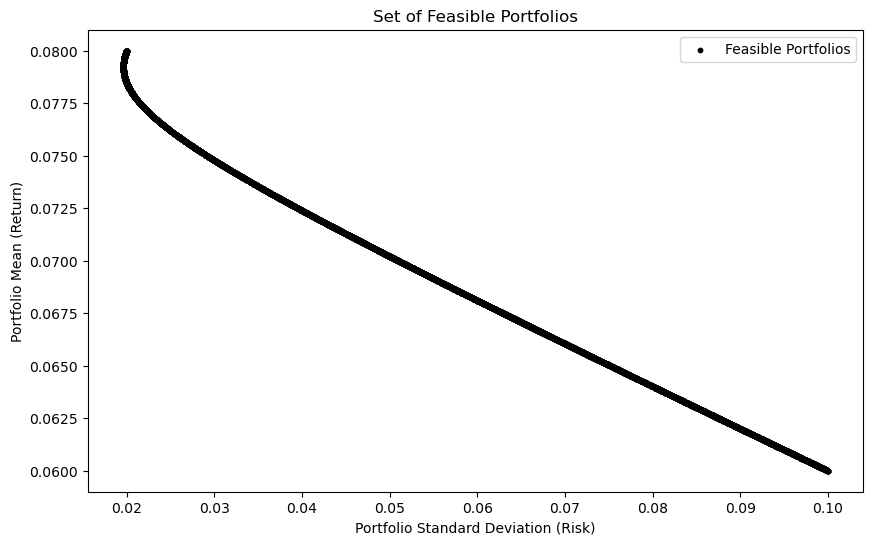

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random portfolios
num_portfolios = 10000
portfolio_means = []
portfolio_stds = []

# We must perfrom the calculation of mean and standard deviation for each possible 
# combination of assets in the 10000 random portfolios

for _ in range(num_portfolios):
    # Generate Monte Carlo Simulations
    wgAssets = nDirichletSamples(2)
    
    # Calculate portfolio mean and standard deviation
    mnPortfMean = np.dot(mu, wgAssets)
    mnPortfVar = np.dot(wgAssets, np.dot(cov, wgAssets))
    mnPortfStd = np.sqrt(mnPortfVar)
    
    # Set of all Means and Standard Deviations
    portfolio_means.append(mnPortfMean)
    portfolio_stds.append(mnPortfStd)

# Plot the feasible set
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_stds, portfolio_means, c='black', alpha=1, s=10, label='Feasible Portfolios')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Mean (Return)')
plt.title('Set of Feasible Portfolios')
plt.legend()
plt.show()

Similarly, the feasible region for the three correlated assets we solved earlier is given below.

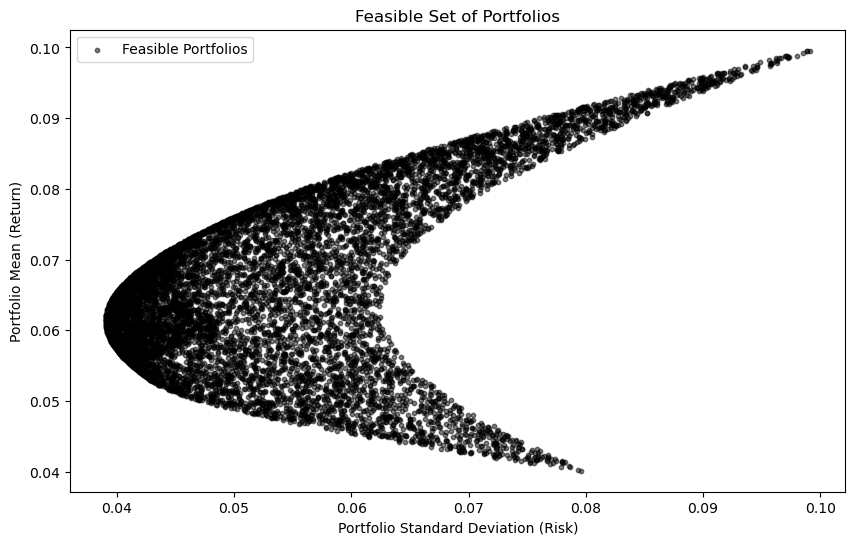

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random portfolios
num_portfolios = 10000
portfolio_means = []
portfolio_stds = []

# We must perfrom the calculation of mean and standard deviation for each possible 
# combination of assets in the 10000 random portfolios
for _ in range(num_portfolios):
    # Generate Monte Carlo Simulations
    wgdAssets = nDirichletSamples(3)
    
    # Calculate portfolio mean and standard deviation
    vnPortfMean = np.dot(mnMean,wgdAssets)
    vnPortfVar = np.dot(wgdAssets,np.dot(mnCov,wgdAssets))
    vnPortfStd = np.sqrt(vnPortfVar)
    
    # Set of all Means and Standard Deviations
    portfolio_means.append(vnPortfMean)
    portfolio_stds.append(vnPortfStd)

# Plot the feasible set
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_stds, portfolio_means, c='black', alpha=0.5, s=10, 
            label='Feasible Portfolios')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Mean (Return)')
plt.title('Feasible Set of Portfolios')
plt.legend()
plt.show()

### Scenario II: Feasible Set of Uncorrelated Assets

In the following block of code, we assume that the two assets are uncorrelated and graph the feasible region of this problem.

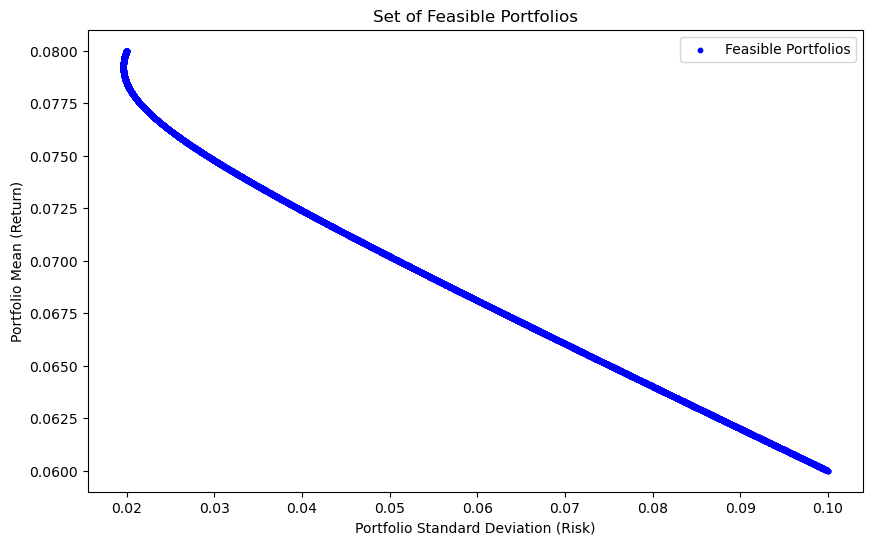

In [54]:
### Graphing the Feasible Region

import matplotlib.pyplot as plt
import numpy as np

# Generate random portfolios
num_portfolios = 10000
portfolio_means = []
portfolio_stds = []

# We must perfrom the calculation of mean and standard deviation for each possible 
# combination of assets in the 10000 random portfolios

for _ in range(num_portfolios):
    # Generate Monte Carlo Simulations
    wgAssets = nDirichletSamples(2)
    
    # Calculate portfolio mean and standard deviation
    mnPortfMean = np.dot(mu, wgAssets)
    mnPortfVar = np.dot(wgAssets, np.dot(cov, wgAssets))
    mnPortfStd = np.sqrt(mnPortfVar)
    
    # Set of all Means and Standard Deviations
    portfolio_means.append(mnPortfMean)
    portfolio_stds.append(mnPortfStd)

# Plot the feasible set
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_stds, portfolio_means, c='blue', alpha=1, s=10, 
            label='Feasible Portfolios')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Mean (Return)')
plt.title('Set of Feasible Portfolios')
plt.legend()
plt.show()

For the three uncorrelated assets, the feasible region is graphed below.

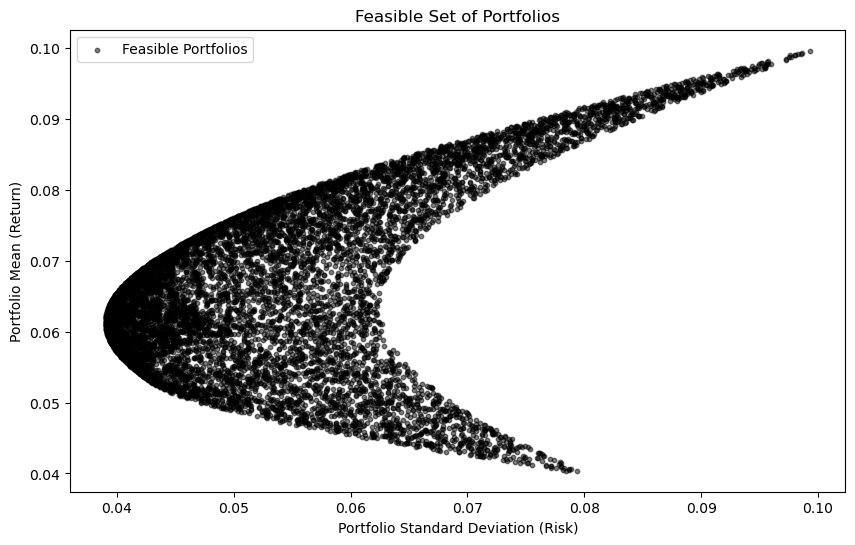

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random portfolios
num_portfolios = 10000
portfolio_means = []
portfolio_stds = []

# We must perfrom the calculation of mean and standard deviation for each possible 
# combination of assets in the 10000 random portfolios

for _ in range(num_portfolios):
    # Generate Monte Carlo Simulations
    wgdAssets = nDirichletSamples(3)
    
    # Calculate portfolio mean and standard deviation
    vnPortfMean = np.dot(mnMean,wgdAssets)
    vnPortfVar = np.dot(wgdAssets,np.dot(mnCov,wgdAssets))
    vnPortfStd = np.sqrt(vnPortfVar)
    
    # Set of all Means and Standard Deviations
    portfolio_means.append(vnPortfMean)
    portfolio_stds.append(vnPortfStd)

# Plot the feasible set
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_stds, portfolio_means, c='black', alpha=0.5, s=10, 
            label='Feasible Portfolios')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Mean (Return)')
plt.title('Feasible Set of Portfolios')
plt.legend()
plt.show()

## Constructing the Optimal Portfolio

We are now almost ready to construct the optimal portfolio we desire. There are two primary approaches to constructing this portfolio:

* Construct only risky assets portfolio
* Construct a portfolio that combines both risk free and risky assets.

Now, let us discuss these approaches.

### Constructing Only Risky Assets Portfolio
In this approach, the underlying assumption is that all assets carry risk, which is typically measured by the standard deviation of the asset’s returns. The goal is to construct a portfolio that optimally balances the risk and return of the chosen risky assets. Graphically, the key objective is to find the portfolio of risky assets that lies on the efficient frontier.

However, the disadvantage of this method is that it does not involve a cash position (i.e., there is no risk-free asset to balance out the portfolio). Therefore, with only risky assets in the mix, we face two possible scenarios:
* Allow shorting (or borrowing) of assets.
* Do not allow shorting.

#### The Solution to the Markowitz Optimization Problem, Considering Only Risky Assets and Allowing Shorting

When shorting is allowed, we can solve the Markowitz optimization problem analytically, which gives us a closed-form solution for the minimum variance portfolio. This solution allows us to determine the optimal portfolio allocation, which minimizes risk while maximizing expected return.

The optimal proportion of assets in the portfolio is given by the following formula:
$$X = \lambda \Sigma^{-1}\mu + \left(\frac{1-\lambda 1^T \Sigma^{-1}\mu}{1^T \Sigma^{-1}1}\right)\Sigma^{-1}1$$
Where $\lambda $ is a scalar that reflects the risk preference (trade-off between risk and return). When $\lambda = 0$, the solution reduces to the minimum variance portfolio. 

In [58]:
import numpy as np

def optimalPortfolioShort(mnCov,mnMean,mnLambda):
    dimension = len(mnMean)
    onesVector = np.ones(dimension)
    invCov = np.linalg.inv(mnCov)
    optimalAllocation = mnLambda*np.dot(invCov,mnMean) + \
        ((onesVector - mnLambda*np.dot(np.dot(onesVector,invCov),mnMean))/ \
         np.dot(np.dot(onesVector,invCov),onesVector))*np.dot(invCov,onesVector)
    return optimalAllocation

Consider our example on the three correlated assets. We can find the optimal weight allocation of assets for every given value of $\lambda $.

For instance, the optimal solution for 3% risk preference, corresponding to $\lambda = 0.03$ is given by the following.

In [60]:
mnMean = np.array([0.06,0.04,0.10])
mnSigma = np.array([0.05,0.08,0.10])
mnDiagonal_sigma = np.array([[0.05, 0,0],[0,0.08,0],[0,0,0.10]])
mnCor = np.array([[1,0.30,0.80],[0.30,1,0.50],[0.80,0.30,1]])
mnCov = np.dot(mnDiagonal_sigma,np.dot(mnCor,mnDiagonal_sigma))

In [62]:
optimalPortfolioShort(mnCov,mnMean,mnLambda=0.03)

array([ 0.93927126,  0.1194332 , -0.05870445])

Likewise, the minimum variance portfolio for this problem, which occurs at $\lambda = 0$ is given by

In [36]:
optimalPortfolioShort(mnCov,mnMean,mnLambda=0)

array([ 1.05263158,  0.26315789, -0.31578947])

In [108]:
# Getting optimal portfolios for different values of lambda using for loop

def computeOptimalPortfolios(mnCov, mnMean, lambda_start, lambda_end, lambda_step):
    dimension = len(mnMean)
    optimal_portfolios = []
    
    # Loop over different lambda values and compute the optimal portfolio for each
    for mnLambda in np.arange(lambda_start, lambda_end + lambda_step, lambda_step):
        optimal_allocation = optimalPortfolioShort(mnCov, mnMean, mnLambda)
        optimal_portfolios.append((mnLambda, optimal_allocation))
    
    return optimal_portfolios

In [110]:
optimal_portfolios = computeOptimalPortfolios(mnCov, mnMean, lambda_start=0.0, 
                                              lambda_end=0.1, lambda_step=0.01)

optimal_portfolios

[(0.0, array([ 1.05263158,  0.26315789, -0.31578947])),
 (0.01, array([ 1.0148448 ,  0.21524966, -0.23009447])),
 (0.02, array([ 0.97705803,  0.16734143, -0.14439946])),
 (0.03, array([ 0.93927126,  0.1194332 , -0.05870445])),
 (0.04, array([0.90148448, 0.07152497, 0.02699055])),
 (0.05, array([0.86369771, 0.02361673, 0.11268556])),
 (0.06, array([ 0.82591093, -0.0242915 ,  0.19838057])),
 (0.07, array([ 0.78812416, -0.07219973,  0.28407557])),
 (0.08, array([ 0.75033738, -0.12010796,  0.36977058])),
 (0.09, array([ 0.71255061, -0.16801619,  0.45546559])),
 (0.1, array([ 0.67476383, -0.21592443,  0.54116059]))]

#### Behaviour of Risky Asset Only Portfolio with Shorts Allowed in Relation to Risk Tolerance 

In [113]:
import matplotlib.pyplot as plt
import numpy as np

def plotOptimalPortfolios(optimal_portfolios):
    # Extract lambda values and portfolio allocations for plotting
    lambda_values = [item[0] for item in optimal_portfolios]
    optimal_allocations = np.array([item[1] for item in optimal_portfolios])
    
    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot each allocation component as a line plot
    for i in range(optimal_allocations.shape[1]):  # iterate over assets
        plt.plot(lambda_values, optimal_allocations[:, i], label=f"Asset {i+1}", 
                 linewidth=2)

    plt.xlabel(r"$\lambda$", fontsize=12)
    plt.ylabel("$x_i$", fontsize=12)
    plt.title("Assets and Risk Tolerance in an Efficient Portfolio", fontsize=14)
    plt.legend(title="Assets", fontsize=12)
    plt.grid(True)

    # Show plot
    plt.show()

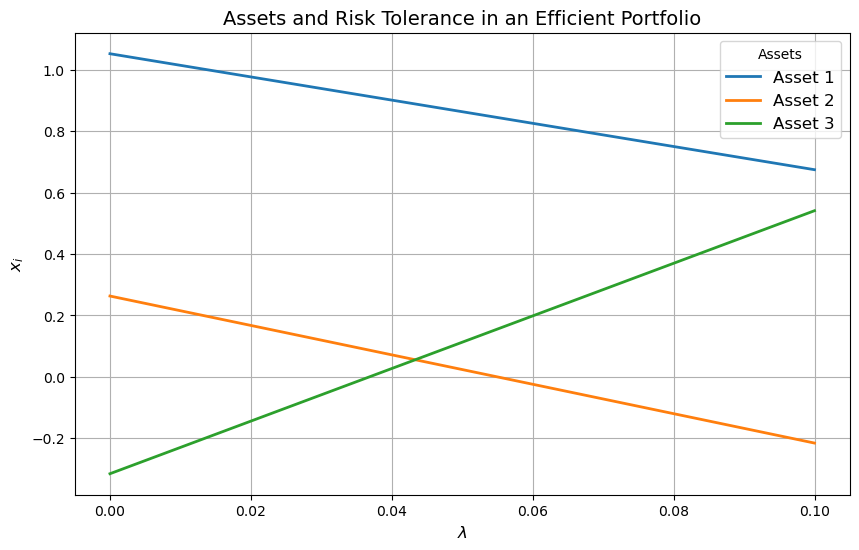

In [115]:
plotOptimalPortfolios(optimal_portfolios)

The diagram above illustrates how the allocation to each of the three assets changes as $\lambda $ varies. This plot helps investors determine which assets to allocate more of their resources to based on their risk preferences. Additionally, the plot provides insight into the investment behavior of individuals who invest in this portfolio. For example, as $\lambda $ increases (indicating a decrease in risk aversion), the allocation to Asset 1 decreases. This suggests that as the investor becomes more risk-tolerant and less risk averse, they shift their resources away from Asset 1 in favor of potentially riskier assets. Moreover, as an investor desires to take more risk, the investor shorts (or borrow) more and more of Asset 2 and short less of Asset 3, while increasing the proportional weight of Asset 3 in the portfolio.

The efficient portfolio diagram above provides detailed allocation insights tailored to specific risk preferences. However, some investors may not have a defined risk tolerance in mind. Instead, they seek a general overview of all possible portfolios to identify combinations of assets that maximize returns while minimizing risk.

In such cases, the efficient frontier becomes particularly important, as it highlights the portfolios that achieve the best possible risk-return trade-offs, regardless of specific risk preferences. This makes it a valuable tool for investors aiming to optimize their investments holistically.

#### The Efficient Frontier of a Risky Asset Only Portfolio with Shorts Allowed

The efficient frontier is the boundary of the feasible region that represents the portfolios with the best possible risk-return trade-off. Analysing portfolio using the efficient frontier has the following advantages:

* It shows the entire set of optimal risk-return combinations for a given set of assets, helping investors select portfolios based on their specific risk tolerance if they have it mind.
  
* For investors with no prior risk preference, the efficient frontier provides the complete spectrum of efficient portfolios without needing to specify a particular level of risk aversion ($\lambda $).

* Investors can use it as a benchmark to compare the performance of other portfolios. Any portfolio lying below the efficient frontier is considered suboptimal.

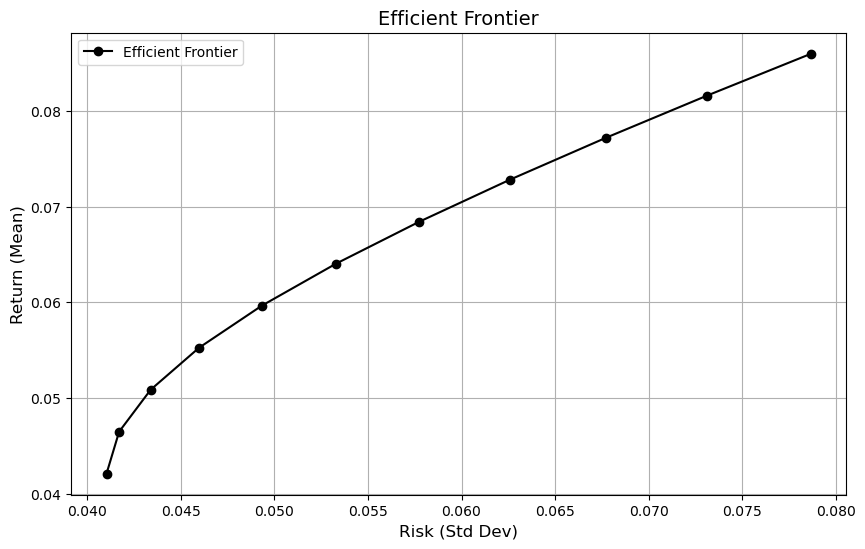

In [117]:
# Compute the efficient frontier (risk, return, lambda, weights)
efficient_frontier = [
    (
        np.sqrt(np.dot(weights, np.dot(mnCov, weights))),  # Risk (Std Dev)
        np.dot(mnMean, weights),                           # Return (Mean)
        mnLambda,                                          # Lambda
        weights                                            # Weights
    )
    for mnLambda, weights in optimal_portfolios
]

# Extract risk and return for plotting
risk = [point[0] for point in efficient_frontier]
return_ = [point[1] for point in efficient_frontier]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(risk, return_, '-o', color='black', label='Efficient Frontier')
plt.xlabel('Risk (Std Dev)', fontsize=12)
plt.ylabel('Return (Mean)', fontsize=12)
plt.title('Efficient Frontier', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# The asset allocations on the efficient frontier with their corresponding risk tolerance,
# risk level and return

print(f"{'Lambda':>10} {'Risk':>10} {'Return':>10} {'Weights':>25}")
print("=" * 70)
for risk, return_, lambda_val, weights in efficient_frontier:
    print(f"{lambda_val:>10.2f} {risk:>10.4f} {return_:>10.4f}{'   '} {weights}")

    Lambda       Risk     Return                   Weights
      0.00     0.0410     0.0421    [ 1.05263158  0.26315789 -0.31578947]
      0.01     0.0417     0.0465    [ 1.0148448   0.21524966 -0.23009447]
      0.02     0.0434     0.0509    [ 0.97705803  0.16734143 -0.14439946]
      0.03     0.0460     0.0553    [ 0.93927126  0.1194332  -0.05870445]
      0.04     0.0493     0.0596    [0.90148448 0.07152497 0.02699055]
      0.05     0.0533     0.0640    [0.86369771 0.02361673 0.11268556]
      0.06     0.0577     0.0684    [ 0.82591093 -0.0242915   0.19838057]
      0.07     0.0626     0.0728    [ 0.78812416 -0.07219973  0.28407557]
      0.08     0.0677     0.0772    [ 0.75033738 -0.12010796  0.36977058]
      0.09     0.0731     0.0816    [ 0.71255061 -0.16801619  0.45546559]
      0.10     0.0787     0.0860    [ 0.67476383 -0.21592443  0.54116059]


#### The Solution to the Markowitz Optimization Problem, Considering Only Risky Assets and No Shorting is Allowed

If shorting is not allowed, then we cannot have a negative allocation of either asset. That is, $x \geq 0 $ for all $x$. This makes the problem more complicated, and thus, we cannot find a closed-form analytic solution to the optimization problem. Therefore, we rely on quadratic programming and computer software.

We wish to solve the following problem

\begin{align}
\text{Minimize } \quad \dfrac{1}{2}&X^{T}\Sigma X& \\
\text{subject to } \quad \mu^{T}X & \geq \tau \\
1^{T}X &=1 \\
X & \geq 0 \\
\end{align}

Where $\tau $ is the minimum expected return also called the target return, set by the investor. At $\tau = 0$, the solution reduces to the minimum variance portfolio for risky asset only portfolio with no shorts allowed.

In [76]:
from cvxopt import matrix, solvers

def optimalPortfolioNoShort(mnMean, mnCov, tau):

  # Convert data to cvxopt format
  n = mnCov.shape[0]
  P = matrix(mnCov)  # Objective function matrix
  q = matrix(np.zeros(n))  # Objective function vector
  G = matrix(-mnMean.T, (1, len(mnMean)), 'd')  # Inequality constraint matrix
  h = matrix(-tau)  # Inequality constraint vector
  A = matrix(np.ones((1, n)))  # Equality constraint matrix
  b = matrix(1.0)  # Equality constraint vector

  # Solve the QP
  solvers.options['show_progress'] = False 
  sol = solvers.qp(P, q, G, h, A, b)

  # Extract optimal weights
  w = np.array(sol['x']).flatten()

  return w

In [78]:
# Applying to our three-correlated-asset problem

mnMean = np.array([0.06,0.04,0.10])
mnSigma = np.array([0.05,0.08,0.10])
mnDiagonal_sigma = np.array([[0.05, 0,0],[0,0.08,0],[0,0,0.10]])
mnCor = np.array([[1,0.30,0.80],[0.30,1,0.50],[0.80,0.30,1]])
mnCov = np.dot(mnDiagonal_sigma, np.dot(mnCor, mnDiagonal_sigma))
tau = 0.08  # Desired minimum expected return (τ)

optimal_weights = optimalPortfolioNoShort(mnMean, mnCov, tau)
print("Optimal weights:", optimal_weights)

Optimal weights: [ 0.58702778 -0.05802178  0.470994  ]


In [80]:
sum(optimal_weights)

1.0

The mimum variance portfolio is given by

In [83]:
minimumVarPortfolio = optimalPortfolioNoShort(mnMean, mnCov, tau=0.0)  #keep in 1dp
print("Minimum Variance Portfolio:", minimumVarPortfolio)

Minimum Variance Portfolio: [ 1.1358022   0.18518507 -0.32098727]


In [85]:
# Getting optimal portfolios for different values of tau using for loop

def computeOptimalPortfoliosNoShorts(mnCov, mnMean):
    tau_start = np.dot(mnMean, minimumVarPortfolio)  # based on minimum variance portfolio
    tau_end = np.max(mnMean)  # Use the maximum expected return for tau_end
    tau_step = (tau_end - tau_start) / 25  
    
    optimal_portfoliosNoShorts = []

    # Loop over different tau values and compute the optimal portfolio for each
    for tau in np.arange(tau_start, tau_end + tau_step, tau_step):
        optimal_allocation = optimalPortfolioNoShort(mnMean, mnCov, tau)
        optimal_portfoliosNoShorts.append((tau, optimal_allocation))
    
    return optimal_portfoliosNoShorts

In [87]:
optimal_portfoliosNoShorts = computeOptimalPortfoliosNoShorts(mnCov, mnMean)
optimal_portfoliosNoShorts

[(0.04345680806083047, array([ 1.13580239,  0.18518515, -0.32098754])),
 (0.04571853573839725, array([ 1.10180582,  0.17011849, -0.2719243 ])),
 (0.04798026341596403, array([ 1.06785111,  0.15507038, -0.22292149])),
 (0.05024199109353081, array([ 1.03389315,  0.14002083, -0.17391398])),
 (0.052503718771097586, array([ 0.99993316,  0.12497038, -0.12490353])),
 (0.054765446448664365, array([ 0.96597181,  0.10991933, -0.07589114])),
 (0.057027174126231144, array([ 0.93200959,  0.09486789, -0.02687748])),
 (0.05928890180379792, array([0.89804678, 0.07981619, 0.02213703])),
 (0.0615506294813647, array([0.86408355, 0.0647643 , 0.07115216])),
 (0.06381235715893148, array([0.83011998, 0.04971227, 0.12016775])),
 (0.06607408483649826, array([0.79615617, 0.03466012, 0.16918371])),
 (0.06833581251406504, array([0.76219214, 0.01960788, 0.21819999])),
 (0.07059754019163181, array([0.72822807, 0.00455562, 0.26721631])),
 (0.0728592678691986, array([ 0.6942647 , -0.01049633,  0.31623163])),
 (0.07512

#### Behaviour of Risky Asset Only Portfolio with No Shorts Allowed in Relation to Target Return

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def plotOptimalPortfoliosNoShorts(optimal_portfoliosNoShorts):
    # Extract lambda values and portfolio allocations for plotting
    
    tau_values = [item[0] for item in optimal_portfoliosNoShorts]
    optimal_allocations = np.array([item[1] for item in optimal_portfoliosNoShorts])
    
    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot each allocation component as a line plot
    for i in range(optimal_allocations.shape[1]):  # iterate over assets
        plt.plot(tau_values, optimal_allocations[:, i], label=f"Asset {i+1}", linewidth=2)

    plt.xlabel(r"$\tau$", fontsize=12)
    plt.ylabel("$x_i$", fontsize=12)
    plt.title("Assets and Target Return in an Efficient Portfolio with No Shorts Allowed", 
              fontsize=14)
    plt.legend(title="Assets", fontsize=12)
    plt.grid(True)

    # Show plot
    plt.show()

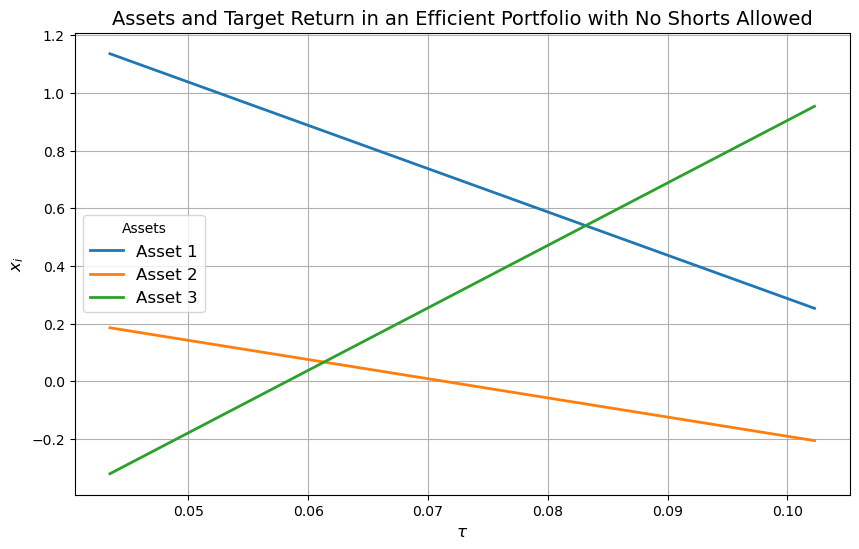

In [91]:
plotOptimalPortfoliosNoShorts(optimal_portfoliosNoShorts)

The diagram above shows how the assets in the efficient portfolio react to changes in the target return. Asset 1 and Asset 2, for instance, have a direct negative relationship with the minimum expected return, $\tau $, or the target return, such that as investors target a higher return for their investment, they tend to reduce the proportion of Asset 1 and Asset 2 in the portfolio. Meanwhile, the weight assigned to Asset 1 is always greater than weight assigned to Asset 2 in the portfolio. On the contrary, as target return increases, investors tend to increase the proportion of Asset 3 in this portfolio.

#### The Efficient Frontier of a Risky Asset Only Portfolio with No Shorts Allowed

The efficient frontier gives the set of achievable portfolios that represents the best possible trade off between risk and return.

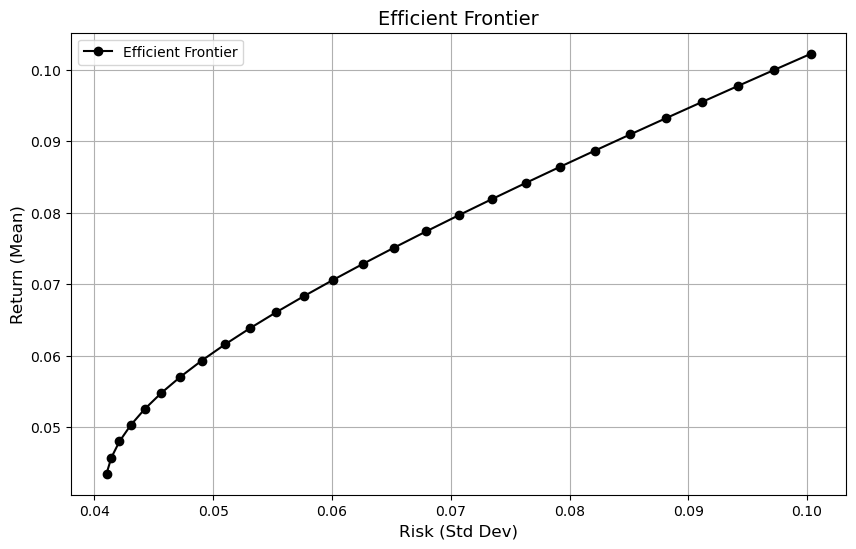

In [93]:
# Compute the efficient frontier (risk, return, lambda, weights)
efficient_frontierNoShorts = [
    (
        np.sqrt(np.dot(weights, np.dot(mnCov, weights))),  # Risk (Std Dev)
        np.dot(mnMean, weights),                           # Return (Mean)
        tau,                                          # Lambda
        weights                                            # Weights
    )
    for tau, weights in optimal_portfoliosNoShorts
]

# Extract risk and return for plotting
riskNoShort = [point[0] for point in efficient_frontierNoShorts]
returnNoShort = [point[1] for point in efficient_frontierNoShorts]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(riskNoShort, returnNoShort, '-o', color='black', label='Efficient Frontier')
plt.xlabel('Risk (Std Dev)', fontsize=12)
plt.ylabel('Return (Mean)', fontsize=12)
plt.title('Efficient Frontier', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

#### Comparing the Risky-Asset-Only Portfolio Efficient Frontiers: Shorts Allowed vs No Shorts Allowed

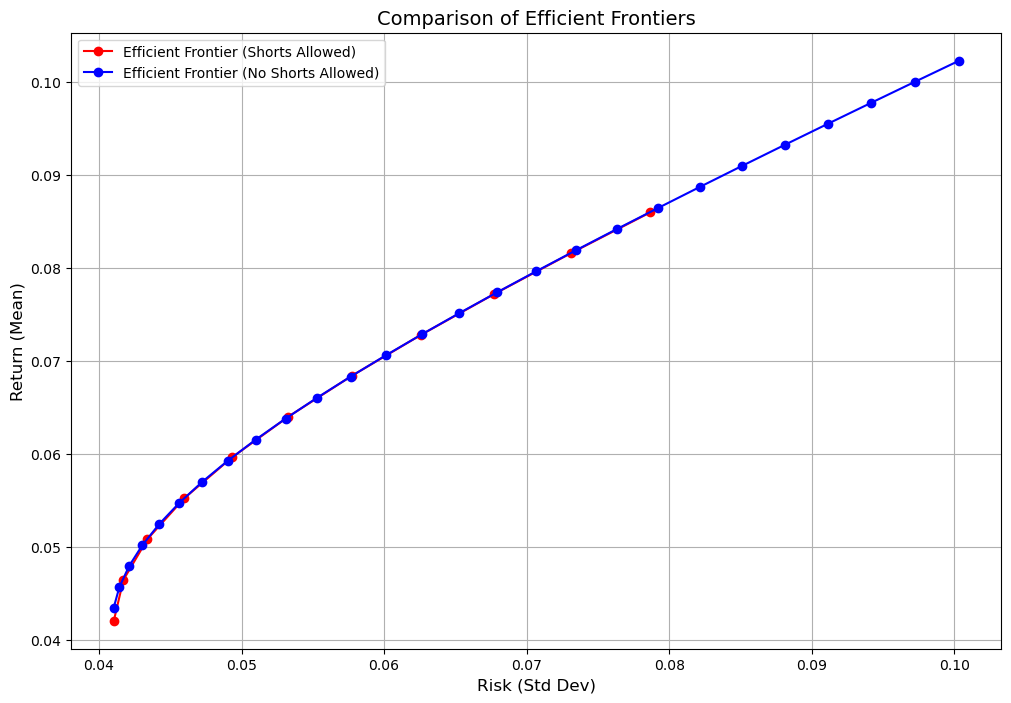

In [96]:
# Compute the first efficient frontier (risky assets only, shorts allowed)
efficient_frontier = [
    (
        np.sqrt(np.dot(weights, np.dot(mnCov, weights))),  # Risk (Std Dev)
        np.dot(mnMean, weights),                           # Return (Mean)
        mnLambda,                                          # Lambda
        weights                                            # Weights
    )
    for mnLambda, weights in optimal_portfolios
]

# Extract risk and return for plotting
risk1 = [point[0] for point in efficient_frontier]
return1 = [point[1] for point in efficient_frontier]

# Compute the second efficient frontier (no shorts allowed)
efficient_frontierNoShorts = [
    (
        np.sqrt(np.dot(weights, np.dot(mnCov, weights))),  # Risk (Std Dev)
        np.dot(mnMean, weights),                           # Return (Mean)
        tau,                                               # Lambda
        weights                                            # Weights
    )
    for tau, weights in optimal_portfoliosNoShorts
]

# Extract risk and return for plotting
risk2 = [point[0] for point in efficient_frontierNoShorts]
return2 = [point[1] for point in efficient_frontierNoShorts]

# Plot both efficient frontiers
plt.figure(figsize=(12, 8))
plt.plot(risk1, return1, '-o', label='Efficient Frontier (Shorts Allowed)', color='red')
plt.plot(risk2, return2, '-o', label='Efficient Frontier (No Shorts Allowed)', 
         color='blue')
plt.xlabel('Risk (Std Dev)', fontsize=12)
plt.ylabel('Return (Mean)', fontsize=12)
plt.title('Comparison of Efficient Frontiers', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

We could see very minor difference. However in other cases, the difference is very noticeable.

In this part of the analysis, we have looked at how we construct a risky assets-only portfolio. Recall that constructing a risky assets-only portfolio poses the problem of diversification limitations and that we must either allow shorting or not. We have looked at the method of finding the optimal portfolio, the relationship between key parameters ($\lambda $ for shorting allowed and $\tau $ for no shorting allowed) and the assets, and finally the efficient frontier for each of the cases, which gives the portfolios on the boundary of the feasible region that offer the best possible trade-off between risk and return, that is, portfolio selections that yield the largest possible return at the least possible risk.


#### Selecting a Risky Asset Portfolio

From our analysis of the construction of risky asset portfolios, an investor can select any of the portfolios on the efficient frontier depending on the investor's risk tolerance level when shorting is allowed or target return when no shorting is allowed. Such a selection gives a subjective yet optimal portfolio for an investor.

Next, let us consider the second type of portfolio - one that combines both risky assets and risk free assets. We shall look at how we can construct a tangent portfolio for this case of portfolio construction.

### Constructing a Tangent Portfolio

The tangent portfolio is considered the equilibrium portfolio, that represents the optimal portfolio of risky assets that all investors should hold in equilibrium. To find the tangent portfolio, we combine the risky assets with riskfree assets and determine that portfolio which has a zero cash position. 

The tangent portfolio occurs at the point where the portfolio line is tangential to the efficient frontier. 

Consider the following definitions:

* A **portfolio line** gives the possible combinations of all risk free and risky assets that can be used to form a given portfolio.
  
* The slope of the portfolio line is called the **Sharpe ratio** - a statistic that describes the return of an investment, in relation to its risk. $$ \text{Sharpe Ratio }\ = \dfrac{\mu_\rho - r_f}{\sigma_\rho}$$ where \
$\mu_\rho $ is the overall portfolio mean \
$\sigma_\rho $ is the overall portfolio standard deviation


While in most cases we require numerical techniques to find the tangent portfolio, in some cases, we can find a closed form solution of the mean-variance optimization which gives the tangent portfolio. The optimal portfolio is the point of tangency between the portfolio line and the efficient frontier. 

* The efficient frontier is the set of points in the feasible region of a portfolio, that are pareto optimal such that moving away from this frontier reduces expected return and increases risk, making the investor worse off.

#### The Solution to the Markowitz Optimization Problem, Considering Only Risky Assets and Allowing Shorting

The analytic solution that gives the optimal allocation of assets is 
$$x_\tau = \dfrac{\Sigma^{-1}\left(\mu - 1r_f\right)}{1^T \Sigma^{-1}\left(\mu - 1r_f\right)} $$

The point of tangency in the standard deviation-mean space is $\left(\sigma_\tau , \mu_\tau \right)$ such that 
$$\sigma_\tau = \sqrt{x_{\tau}^{T}\Sigma x_\tau }$$ and $$ \mu_\tau = x_{\tau}^{T}\mu $$

In [98]:
import numpy as np

def tangentPortfolio(mnCov,mnMean,riskFreeRate):
    dimension = len(mnMean)
    onesVector = np.ones(dimension)
    invCov = np.linalg.inv(mnCov)
    tangentAllocation = (np.dot(invCov,(mnMean - onesVector*riskFreeRate)))/ \
        np.dot(onesVector,np.dot(invCov,(mnMean - onesVector*riskFreeRate)))
    return tangentAllocation

In [100]:
mnMean = np.array([0.06,0.04,0.10])
mnSigma = np.array([0.05,0.08,0.10])
mnDiagonal_sigma = np.array([[0.05, 0,0],[0,0.08,0],[0,0,0.10]])
mnCor = np.array([[1,0.30,0.80],[0.30,1,0.50],[0.80,0.30,1]])
mnCov = np.dot(mnDiagonal_sigma, np.dot(mnCor, mnDiagonal_sigma))
riskFreeRate = 0.005

In [102]:
tangentportfolio = tangentPortfolio(mnCov,mnMean,riskFreeRate)
tangentportfolio

array([0.87544618, 0.03851212, 0.08604171])

In [104]:
# The portfolio standard deviation is

portStd = np.sqrt(np.dot(tangentportfolio, np.dot(mnCov,tangentportfolio)))

# The portfolio mean is

portMean = np.dot(tangentportfolio,mnMean)

print("Portfolio Standard Deviation : ", portStd)
print("Portfolio Mean : ", portMean)

Portfolio Standard Deviation :  0.05200252147378673
Portfolio Mean :  0.06267142588765733


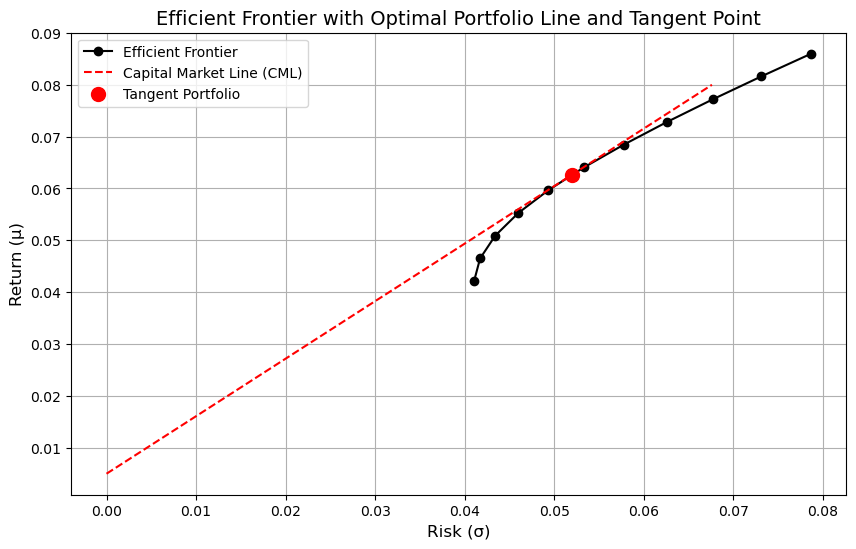

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Portfolio Line or Capital Market Line (CML)
lambdas = np.linspace(0, 1.3, 100) 
cml_risk = [l * portStd for l in lambdas]
cml_return = [riskFreeRate + l * (portMean - riskFreeRate) for l in lambdas]

# Plotting the efficient frontier and CML:

plt.figure(figsize=(10, 6))
# Plot 1: Efficient Frontier with Shorts Allowed
plt.plot(risk, return_, '-o', color='black', label='Efficient Frontier') 
# Plot 2: CML
plt.plot(cml_risk, cml_return, label="Capital Market Line (CML)", linestyle="--", 
         color="red") 
plt.scatter([portStd], [portMean], color="red", label="Tangent Portfolio", s=100, 
            zorder=5)  # Tangent point
plt.title("Efficient Frontier with Optimal Portfolio Line and Tangent Point", fontsize=14)
plt.xlabel("Risk (σ)", fontsize=12)
plt.ylabel("Return (μ)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

## Summary

The Markowitz Modern Portfolio Theory provides a useful framework for finding the optimal allocation of assets that represents the best trade-off between risk and reward for an investor.

* We first derive theoretical assets by performing a Monte Carlo simulation and sampling assets from a known distribution. In this article, we used the Dirichlet distribution. A 3D plot of the sampled assets satisfies the Portfolio Diagram Lemma due to its triangular shape.
  
* We then find the mean and standard deviation vectors of the portfolio. In most cases, these are given, or we can find them from historical data.

* We then use the given mean and standard deviation vectors to find the portfolio mean and standard deviation by applying matrix procedures. The expected return and risk of the portfolio depend on whether the assets are correlated or not. This is because the covariance matrix of correlated assets is not necessarily equal to the covariance matrix of uncorrelated assets. Usually, we will be told whether the assets are correlated, but in situations where we do not know, we can perform advanced statistical tests to ascertain the level of dependence among the assets. We recommend that our readers perform further studies in this area if they wish to.

* The process of finding the feasible set is not always necessary; however, it gives useful insights regarding the various alternatives of portfolios that could be assembled from the assets we have. The shape of the feasible set for two assets is always linear or a curve, while that for more than two assets is convex in the risk-return space.

* The most important part is to construct the optimal portfolio. This could be achieved either by constructing a portfolio with only risky assets or by combining both risky and risk-free assets.

* To create a portfolio of risky assets, the investor must decide whether to allow for shorting, due to the problem of diversification associated with constructing a portfolio of only risky assets. We can find the set of optimal portfolios that lie on the efficient frontier using a closed-form analytic solution, if shorting is allowed. Otherwise, we must perform quadratic programming to determine the set of portfolios that lie on the efficient frontier.

* When both risky and riskless assets are combined to form a portfolio, an optimal portfolio that represents the equilibrium portfolio can be determined by finding the tangent portfolio. This could be done with a closed-form formula. The tangent portfolio is the ideal solution and what we set out to find, as it gives the combination of risky assets that could be attained at a zero cash position, providing the advantages of both riskless assets and risk-free assets. Diagrammatically, the tangent portfolio occurs at the point of tangency between the portfolio line (also called the Capital Market Line) and the efficient frontier.

In fact, we can see why the Markowitz Mean-Variance Optimization Theory is very important. It provides the framework for the Capital Asset Pricing Model and provides useful insights that could help investors, individuals, and government agencies in allocating resources effectively.

## References

1. Markowitz, H. (1952). Portfolio selection. The Journal of Finance, 7(1), 77-91.
2. Luenberger, D. G. (2014). Investment Science (2nd ed.). Oxford University Press.
3. Markowitz, Harry (February 2000). Mean-Variance Analysis in Portfolio Choice and Capital Markets. Wiley.
4. Frey, R. (2024). AMS511: Foundations of Quantitative Finance, Lecture 03: Portfolio Optimization. Stony Brook University.
5. Sharpe, W. F. (1964). Capital asset prices: A theory of market equilibrium under conditions of risk. Journal of Finance, 19(3), 425-442.




**About the Author**

Name: Amos Anderson \
Affiliation: PhD Student in Applied Mathematics and Statistics (Quantitative Finance) at Stony Brook University \
LinkedIn URL: https://www.linkedin.com/in/amoskwameanderson/ \
Email: amos.anderson@stonybrook.edu